# Demo of Data I/O for Fragility Epilepsy Using EZTrack EDP

Adam Li

1/10/19: Here, I want to demonstrate how to load in data based on a directory of either raw data, or computed results at the i) center ii) patient and iii) dataset level.

I will extract out the data, and then display.

In [2]:
import os
import sys
import numpy as np

%matplotlib inline
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

sys.path.append("../../")
from eztrack.edp.loaders.centerdata import CenterLoader
from eztrack.edp.loaders.patient.subjectresultsloader import SubjectResultsLoader
from eztrack.edp.loaders.dataset.result.resultloader import ResultLoader

# Import magic commands for jupyter notebook 
%load_ext autoreload
%autoreload 2

# Set Data Directories

Note here that resultsdir is somehow organized, but it doesn't have to be as long as the datafiles are within resultsdir/

In [13]:
center = 'cleveland'
reference = 'common_avg'
modality = 'scalp_winsize1000'

DATADIR = '/Users/adam2392/Downloads/output_new/'
resultsdir = os.path.join(DATADIR,
                          'freq',
                          reference,
                          modality, 
                          center)

# Load in Data
- Center
- Patient
- Dataset

In [14]:
allpats = ['la04']

### Center

In [15]:
centerloader = CenterLoader(centername=center, 
                            subjids=allpats,
                            preload=True,
                            datatype='freq',
                            root_dir=resultsdir)

print("Finished loading in data for this center for {}".format(allpats))

Already renamed seeg.xyz
Already renamed gain.mat
Already renamed seeg.xyz
Already renamed gain.mat
Found 6 jsonfilepaths for la04
Loading results data from:  /Users/adam2392/Downloads/output_new/freq/common_avg/scalp_winsize1000/cleveland/la04_scalp_sz_1p_freqmodel.npz
Loading results data from:  /Users/adam2392/Downloads/output_new/freq/common_avg/scalp_winsize1000/cleveland/la04_scalp_sz_2p_freqmodel.npz
Loading results data from:  /Users/adam2392/Downloads/output_new/freq/common_avg/scalp_winsize1000/cleveland/la04_scalp_sz_3p_freqmodel.npz
Loading results data from:  /Users/adam2392/Downloads/output_new/freq/common_avg/scalp_winsize1000/cleveland/la04_scalp_sz_4p_freqmodel.npz
Loading results data from:  /Users/adam2392/Downloads/output_new/freq/common_avg/scalp_winsize1000/cleveland/la04_scalp_sz_5p_freqmodel.npz
Loading results data from:  /Users/adam2392/Downloads/output_new/freq/common_avg/scalp_winsize1000/cleveland/la04_scalp_sz_6p_freqmodel.npz
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0

In [16]:
print("These are all the datasets: \n", centerloader.get_results())

These are all the datasets: 


In [17]:
testdataset = centerloader.get_results()[0]
testdataset.compute_montage_groups()

print(testdataset.samplerate, testdataset.winsize)

200.0 1000


In [32]:
print(timepoints[0,:]/200.)
print(121*200)

print(500/200)

print(25*1.25, 50*1.25)

[0.       0.024975]
24200
2.5
31.25 62.5


In [30]:
print(testdataset.onsetwin)
print(testdataset.shape)
timepoints = testdataset.samplepoints / testdataset.samplerate

print(timepoints.shape)
print(timepoints[testdataset.onsetwin,:])
print(timepoints[testdataset.onsetwin+35,:])

47
(39, 501, 143)
(143, 2)
[117.5   122.495]
[205.    209.995]


In [18]:
print(testdataset.cezlobeinds)
print(testdataset.cezlobe)

[20, 24, 25, 4, 5, 13, 15, 17]
['right-temporal', 'right-parietal']


### Patient

In [6]:
patientloader = SubjectResultsLoader(subjid=allpats[0],
                            preload=True,
                            datatype='frag',
                            root_dir=resultsdir)

print("Finished loading in data for this patient")

Already renamed seeg.xyz
Already renamed gain.mat
Found 6 jsonfilepaths for la04
Loading results data from:  /Users/adam2392/Downloads/output_new/fragility/common_avg/scalp/cleveland/la04_scalp_sz_1p_fragmodel.npz
Loading results data from:  /Users/adam2392/Downloads/output_new/fragility/common_avg/scalp/cleveland/la04_scalp_sz_2p_fragmodel.npz
Loading results data from:  /Users/adam2392/Downloads/output_new/fragility/common_avg/scalp/cleveland/la04_scalp_sz_3p_fragmodel.npz
Loading results data from:  /Users/adam2392/Downloads/output_new/fragility/common_avg/scalp/cleveland/la04_scalp_sz_4p_fragmodel.npz
Loading results data from:  /Users/adam2392/Downloads/output_new/fragility/common_avg/scalp/cleveland/la04_scalp_sz_5p_fragmodel.npz
Loading results data from:  /Users/adam2392/Downloads/output_new/fragility/common_avg/scalp/cleveland/la04_scalp_sz_6p_fragmodel.npz
Finished loading in data for this patient


In [7]:
print("These are all the datasets: \n", patientloader.get_results())

These are all the datasets: 
 [la04 scalp_sz_1p Fragility Model (39, 570), la04 scalp_sz_2p Fragility Model (39, 1151), la04 scalp_sz_3p Fragility Model (54, 1151), la04 scalp_sz_4p Fragility Model (54, 439), la04 scalp_sz_5p Fragility Model (53, 1019), la04 scalp_sz_6p Fragility Model (53, 1151)]


### Dataset

In [19]:

datasetloader = ResultLoader(jsonfilepath=os.path.join(resultsdir, 'la04_scalp_sz_6p_frag.json'),
                            preload=True,
                            datatype='frag',
                            results_dir=resultsdir)

print("Finished loading in data for this patient")

Loading results data from:  /Users/adam2392/Downloads/output_new/fragility/common_avg/scalp/cleveland/la04_scalp_sz_6p_fragmodel.npz
Finished loading in data for this patient


In [21]:
print("These are all the datasets: \n", datasetloader.result)

These are all the datasets: 
 la04 scalp_sz_6p Fragility Model (53, 1151)


# 2. Using the Data

Note that the datasets are organized in python classes, so each result loaded is a list of these FragilityModelResult classes. See /edp/base/objects/dataset/result_object.py

This class helps user to extract out metadata and reformat data correctly.

Note for scalp data, cezinds returns an empty list, while for ieeg, cezlobeinds will return an empty list.

In [7]:
exdataset = centerloader.get_results()[0]
print(exdataset)

# compute how to separate channels into their lobes
exdataset.compute_montage_groups()

pt1 sz_1 Fragility Model (27, 943)


In [8]:
# get the fragility matrix
fragmat = exdataset.get_data()

# get the corresponding channels labels
chanlabels = exdataset.chanlabels

# get ieeg ez
cezcontacts = exdataset.cezcontacts

# get lobe
cezlobe = exdataset.cezlobe

# get indices of ieeg cez
ieegcezinds = exdataset.cezinds
cezinds = exdataset.cezlobeinds

print(fragmat.shape, len(chanlabels))

print(cezcontacts, cezlobe, ieegcezinds, cezinds)

(27, 943) 27
[] ['right-temporal', 'right-parietal'] [] [20, 24, 25, 4, 5, 13, 15, 17]


# 3. Quick and Dirty Visualization

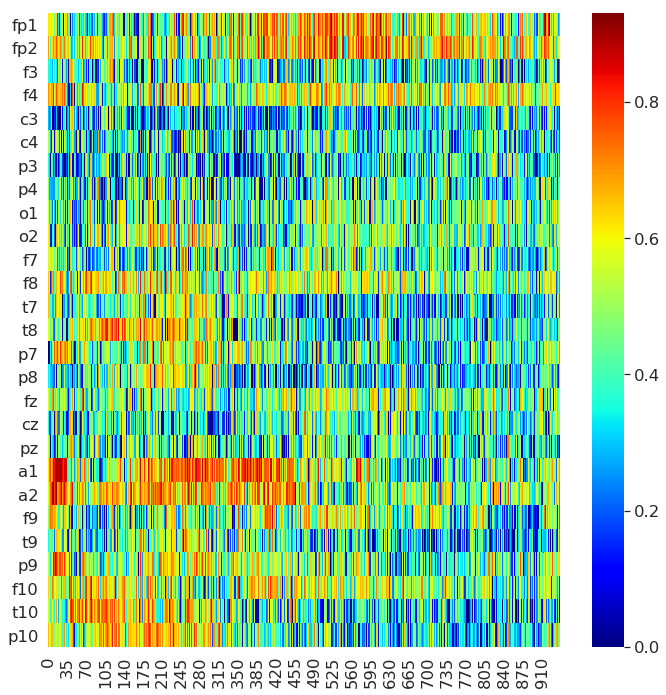

In [10]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(fragmat, cmap='jet', yticklabels=chanlabels)
fig.tight_layout()

In [15]:
timerangesearch = [0, 10, 100, ...]

# defining a window around onset window
for t in timerangesearch:
    start = onsetwin - t
    end = onsetwin + t
    
    # get all the channels and the window you define
    pat[:,start:end]
    
    # run algo to do what we need
    
    

599

In [14]:
for pat in centerloader.get_results()[1:]:
    print(pat, pat.onsetind, pat.onsetwin, pat.samplerate)
    
    metadata = pat.get_metadata()
    testonsetwin = pat.onsetwin
    print(metadata.keys())
    
    pprint(metadata['events'])
    break

pt1 sz_2 Fragility Model (27, 1535) 30000.0 599 200.0
dict_keys(['ablated_contacts', 'age_surgery', 'bad_channels', 'cezlobe', 'chanlabels', 'channeltypes', 'clinical_center', 'clinical_difficulty', 'clinical_match', 'dataset_id', 'date_of_recording', 'engel_score', 'equipment', 'events', 'ez_elecs', 'ez_hypo_brainregion', 'filename', 'gender', 'hand_dominant', 'highpass_freq', 'length_of_recording', 'linefreq', 'lowpass_freq', 'modality', 'montage', 'non_eeg_channels', 'note', 'number_chans', 'numwins', 'offsetind', 'offsetsec', 'onset', 'onset_age', 'onsetind', 'onsetsec', 'outcome', 'patient_id', 'perturbtype', 'radius', 'reference', 'resect_elecs', 'resected_contacts', 'resultfilename', 'samplepoints', 'samplerate', 'stabilizeflag', 'stepsize', 'termination', 'type', 'winsize', 'onsetwin', 'offsetwin'])
[['0.0', '0', '+0.000000'],
 ['0.0', '0', 'Segment: REC START LTM+6 EEG'],
 ['0.0', '0', 'A1+A2 OFF'],
 ['125.0', '0', '+125.000000'],
 ['125.0', '0', 'Spike P7-aT5 1.00'],
 ['150.0